In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from matplotlib.ticker import MultipleLocator


In [2]:
plt.rc("font", family=["Helvetica", "Arial"]) # skifter skrifttype
plt.rc("axes", labelsize=22)   # skriftstørrelse af `xlabel` og `ylabel`
plt.rc("xtick", labelsize=22, top=True, direction="out")
plt.rc("ytick", labelsize=22, right=True, direction="out")
plt.rc("axes", titlesize=22)
plt.rc("legend", fontsize=22)

In [3]:
def load_data(name):
    files = glob.glob('Day 3/Whiskey/'+name+'*.txt')
    data = np.loadtxt(files[0], dtype=np.str, skiprows=14)
    data = np.char.replace(data, ',', '.').astype(np.float64)
    for f in files[1:]:
        temp_data = np.loadtxt(f, dtype=np.str, skiprows=14)
        temp_data = np.char.replace(temp_data, ',', '.').astype(np.float64)
        data[:,1] += temp_data[:,1]
    data[:,1] /= len(files)
    return data

In [28]:
def Boscolo_caramel(name):
    data = load_data(name)
    A_210 = np.sum(data[(47, 48, 49),1])/3
    A_282 = np.sum(data[(204, 205, 206),1])
    return (A_282-(A_210/4.2))/8.0, A_210/A_282

In [4]:
whiskeys = [
    'Aberlour 12',
    'Glenfiddich 15',
    'Macallan',
    'Talisker Dist',
    'Black label',
    'Cragganmore',
    'Dewars 15',
    'Glenfiddich 12',
    'Glenlivet 12',
    'Lakes',
    'Laphroaig',
    'Muirheads',
    'Talisker Skye',
    'Famous Grouse',
    'WhiskeyDirect',
    'Sirup solution'
]

In [5]:
w_data = []
for w in whiskeys:
    print(w)
    w_data.append(load_data(w))

Aberlour 12
Glenfiddich 15
Macallan
Talisker Dist
Black label
Cragganmore
Dewars 15
Glenfiddich 12
Glenlivet 12
Lakes
Laphroaig
Muirheads
Talisker Skye
Famous Grouse
WhiskeyDirect
Sirup solution


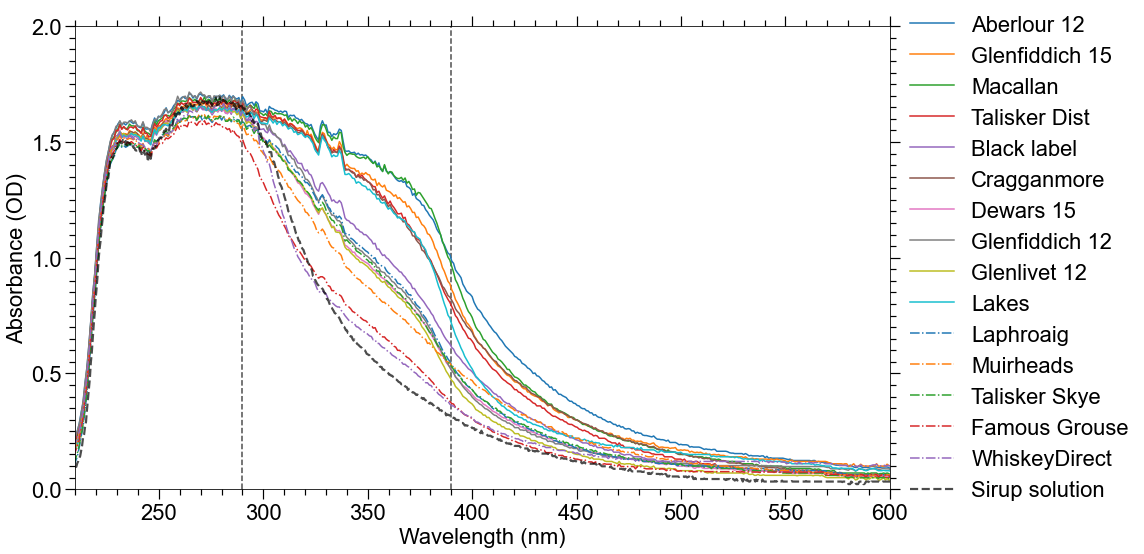

In [11]:
fig,ax = plt.subplots(1, 1)
fig.set_size_inches(16, 8)
linestyles = ['-']*10+(['-.']*(len(whiskeys)-11))

for w,l,linestyle in zip(w_data[:-1], whiskeys[:-1], linestyles):
    ax.plot(w[::2,0], w[::2,1], label=l, ls=linestyle)
ax.plot(w_data[-1][:,0], w_data[-1][:,1]*1.1, label=whiskeys[-1], ls='--', lw=2.2, c='k', alpha=0.7)

plt.tick_params(which='major', axis='both', length=10, width=1.2)
plt.tick_params(which='minor', axis='both', length=6, width=1.2)
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.xaxis.set_major_locator(MultipleLocator(50))

ax.vlines(290, 0, 2, colors='k', ls='--', alpha=0.7)
ax.vlines(390, 0, 2, colors='k', ls='--', alpha=0.7)

ax.set_xlim(210, 600)
ax.set_ylim(0, 2)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Absorbance (OD)')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.tight_layout()
# plt.savefig('whisky_abs_v2.pdf')

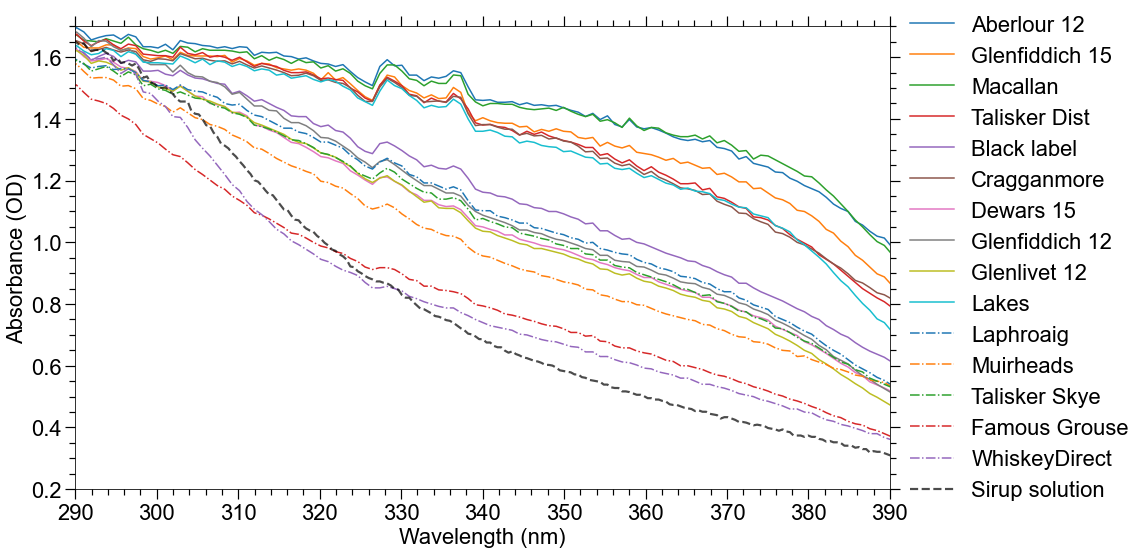

In [7]:
fig,ax = plt.subplots(1, 1)
for w,l,linestyle in zip(w_data[:-1], whiskeys[:-1], linestyles):
    ax.plot(w[::2,0], w[::2,1], label=l, ls=linestyle)
ax.plot(w_data[-1][:,0], w_data[-1][:,1]*1.1, label=whiskeys[-1], ls='--', lw=2.2, c='k', alpha=0.7)

plt.tick_params(which='major', axis='both', length=10, width=1.2)
plt.tick_params(which='minor', axis='both', length=6, width=1.2)
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.xaxis.set_minor_locator(MultipleLocator(2))
ax.xaxis.set_major_locator(MultipleLocator(10))

ax.set_xlim(290, 390)
ax.set_ylim(0.2, 1.7)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Absorbance (OD)')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)

fig.set_size_inches(16, 8)
plt.tight_layout()
# plt.savefig('whisky_abs_zoom_v3.pdf')

In [27]:
w_data[0][(204,206),0]

array([281.908, 282.822])

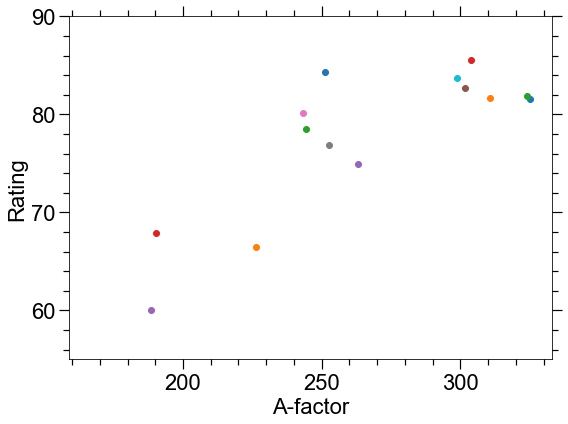

In [236]:
c_factor = []
age = [12, 15, -1, 12, 12, 12, 15, 12, 12, -1, -1, 3, 3, 3, 12, 0]
ratings = {
    'Aberlour 12' : 81.56,
    'Macallan'    : 81.87,
    'Glenfiddich 12' : 76.83,
    'Glenfiddich 15' : 81.64,
    'Dewars 15' : 80.15,
    'Black label' : 74.97,
    'Famous Grouse' : 67.89,
    'Talisker Skye' : 78.5,
    'Talisker Dist' : 85.59,
    'Laphroaig' : 84.28,
    'Lakes' : 83.76,
    'Glenlivet' : 78.61,
    'Muirheads' : 66.5,
    'Cragganmore' : 82.67,
    'WhiskeyDirect' : 60
}
fig,ax = plt.subplots(1, 1)
fig.set_size_inches(8,6)
for w,l,a in zip(w_data[:], whiskeys[:], age):
    c_factor.append(np.trapz(w[220:445,1]))
    ax.scatter(c_factor[-1], ratings.get(l, 0), label=l)
ax.set_xlabel('A-factor')
ax.set_ylabel('Rating')
# plt.xlim(100, 250)
ax.set_ylim(55, 90)
plt.tick_params(which='major', axis='both', length=10, width=1.2)
plt.tick_params(which='minor', axis='both', length=6, width=1.2)
ax.yaxis.set_minor_locator(MultipleLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.xaxis.set_major_locator(MultipleLocator(50))
plt.tight_layout()
# plt.savefig('rating_v2.pdf')

In [29]:
for w in whiskeys:
    print(Boscolo_caramel(w))

(0.6255833333333333, 0.04428627916172401)
(0.6141309523809524, 0.034719418651594676)
(0.6200992063492063, 0.041250831669993354)
(0.616750992063492, 0.042962219993313275)
(0.6039781746031747, 0.03506071489652812)
(0.611574074074074, 0.034684684684684684)
(0.6039206349206349, 0.03503010399562124)
(0.6243849206349207, 0.04567656765676567)
(0.6068809523809524, 0.035130718954248366)
(0.6078412698412698, 0.03534529635671561)
(0.5926289682539683, 0.02550663871418588)
(0.5928015873015874, 0.03651059085841694)
(0.5926934523809524, 0.027239392352016764)
(0.5774880952380952, 0.034349506225848016)
(0.6079712301587301, 0.039545145960624584)
(0.5673809523809524, 0.01929824561403509)


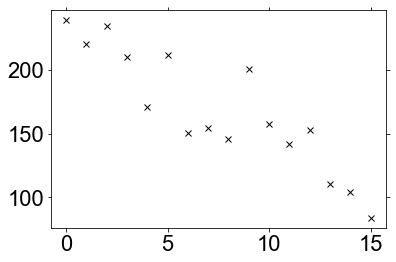

In [120]:
plt.plot(c_factor, 'kx')

Famous Grouse
WhiskeyDirect
Sirup solution


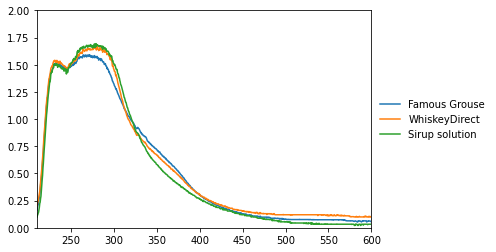

In [34]:
names = ['Famous Grouse', 'WhiskeyDirect', 'Sirup solution']
for w in names:
    print(w)
    data = load_data(w)
    if w == 'Sirup solution':
        data[:,1]*=1.1
    plt.plot(data[:,0], data[:,1], label=w)

plt.xlim(210, 600)
plt.ylim(0, 2)
plt.legend(loc='center left', bbox_to_anchor=(1.00, 0.5), frameon=False)

In [242]:
sugar = load_data('Sugar solution')

(0.0, 0.5)

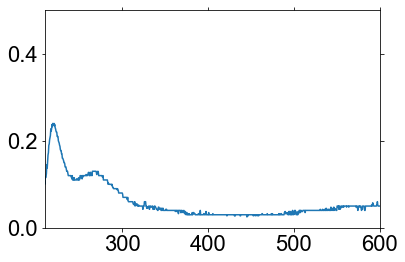

In [245]:
fig,ax = plt.subplots(1, 1)

ax.plot(sugar[:,0], sugar[:,1])
ax.set_xlim(210, 600)
ax.set_ylim(0, 0.5)